In [1]:
import pandas as pd

# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
print(len(col_names))
# KDDTrain+_2.csv & KDDTest+_2.csv are the datafiles without the last column about the difficulty score
# these have already been removed.
df_train = pd.read_csv("KDDTrain+_2.csv", header=None, names = col_names)
df_test = pd.read_csv("KDDTest+_2.csv", header=None, names = col_names)
df_test_21 = pd.read_csv("KDDTest-21.csv", header=None, names = col_names)

# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)
print('Dimensions of the Test-21 set:',df_test_21.shape)

42
Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)
Dimensions of the Test-21 set: (11850, 42)


In [2]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# 对于非数字型，特殊处理
# explore categorical features
print('Training set:')
for col_name in df_train.columns:
    if df_train[col_name].dtypes == 'object' :
        unique_cat = len(df_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
# 拿service看看
print()
print('Distribution of categories in service:')
print(df_train['service'].value_counts().sort_values(ascending=False).head())

# Test set 测试集的类别情况
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
        
# Test 21 set 测试集的类别情况
print('Test 21 set:')
for col_name in df_test_21.columns:
    if df_test_21[col_name].dtypes == 'object' :
        unique_cat = len(df_test_21[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64
Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories
Test 21 set:
Feature 'duration' has 3 categories
Feature 'protocol_type' has 62 categories
Feature 'service' has 11 categories
Feature 'dst_host_srv_rerror_rate' has 38 categories


In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
# Get the categorical values into a 2D numpy array
# 拿到相应的几列数据
train_df_categorical_values = df_train[categorical_columns]
test_df_categorical_values = df_test[categorical_columns]
train_df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [5]:
# 创造新的列，把几种类别摊开
# 训练集
# protocol type
unique_protocol=sorted(df_train.protocol_type.unique())
string_protocol = 'protocol_type_'
unique_protocol_end=[string_protocol + x for x in unique_protocol]
# service
unique_service=sorted(df_train.service.unique())
string_service = 'service_'
unique_service_end=[string_service + x for x in unique_service]
# flag
unique_flag=sorted(df_train.flag.unique())
string_flag = 'flag_'
unique_flag_end=[string_flag + x for x in unique_flag]
# put together
traindumcols=unique_protocol_end + unique_service_end + unique_flag_end
print(traindumcols)

# do same for test set
# 测试集,service少了6种，比较特殊
unique_service_test=sorted(df_test.service.unique())
unique_service_end_test=[string_service + x for x in unique_service_test]
testdumcols=unique_protocol_end + unique_service_end_test + unique_flag_end

['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [6]:
# 将特殊列内容转换为数值型
traindf_categorical_values_enc=train_df_categorical_values.apply(LabelEncoder().fit_transform)
print(traindf_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=test_df_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [7]:
# one-hot 进一步转化为onehot
enc = OneHotEncoder()
traindf_categorical_values_enc_onehot = enc.fit_transform(traindf_categorical_values_enc)
traindf_cat_data = pd.DataFrame(traindf_categorical_values_enc_onehot.toarray(),columns=traindumcols)
# test set
testdf_categorical_values_enc_onehot = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_enc_onehot.toarray(),columns=testdumcols)

traindf_cat_data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# 测试集,service少了6种，比较特殊
trainservice=df_train['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
print(difference)
# print(testdf_cat_data.shape)
# 跟训练集数据保持一致，但是置0
for col in difference:
    testdf_cat_data[col] = 0

print(testdf_cat_data.shape)

['service_harvest', 'service_aol', 'service_red_i', 'service_urh_i', 'service_http_8001', 'service_http_2784']
(22544, 84)


In [9]:
# 整合所有数值型数据
newdf_train=df_train.join(traindf_cat_data)
newdf_train.drop('flag', axis=1, inplace=True)
newdf_train.drop('protocol_type', axis=1, inplace=True)
newdf_train.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf_train.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [10]:
# 分成两种数据，一种正常，一种异常
# take label column
labeldf_train=newdf_train['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf_train=labeldf_train.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write':1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
# put the new label column back
newdf_train['label'] = newlabeldf_train
newdf_test['label'] = newlabeldf_test
print(newdf_train['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [17]:
print(newdf_train.shape)
print(newdf_test.shape)
# newdf_train.to_csv("binary_train123.csv",index=None)
# newdf_test.to_csv("binary_test123.csv",index=None)


# 移动label列 到最后一行
# 训练集
newdf_train_demo = newdf_train
mid_data = newdf_train_demo.pop("label")

newdf_train_demo.insert(122, "label", mid_data)
newdf_train_demo.to_csv("binary_train123.csv",index=None)
print(newdf_train_demo.shape)

# 测试集
newdf_test_demo = newdf_test
mid_data_test = newdf_test_demo.pop("label")

newdf_test_demo.insert(122, "label", mid_data_test)
newdf_test_demo.to_csv("binary_test123.csv",index=None)
print(newdf_test_demo.shape)

(125973, 123)
(22544, 123)
(125973, 123)
(22544, 123)


In [22]:
# 移动label列 到最后一行
# 训练集
newdf_train_origin = df_train
temp_train = newdf_train_origin.pop("label")

newdf_train_origin.insert(41, "label", mid_data)
newdf_train_origin.to_csv("df_train123_origin.csv",index=None)
print(newdf_train_origin.shape)

# 测试集
newdf_test_origin = df_test
temp_test = newdf_test_origin.pop("label")

newdf_test_origin.insert(41, "label", mid_data_test)
newdf_test_origin.to_csv("df_test123_origin.csv",index=None)
print(newdf_test_origin.shape)

(125973, 42)
(22544, 42)


In [ ]:
# 前期数据整理完成


# 后续如进行进一步处理，可以做对比


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

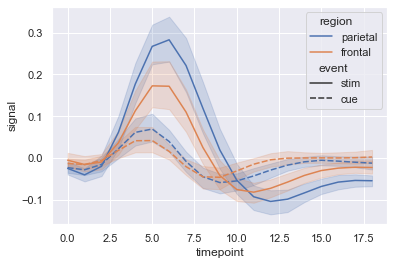

In [3]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

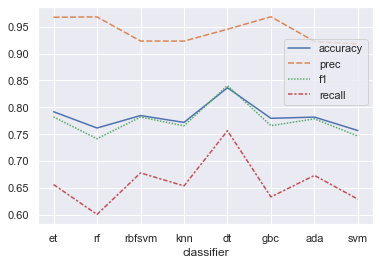

In [12]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

df = pd.read_csv("dd2.csv",encoding = "utf-8")
dd=[df['accuracy'],df['prec'],df['f1'],df['recall']]
sns.lineplot(data=df)

fig = sns.lineplot(x="classifier",data=df)
fig.legend(loc='center right', bbox_to_anchor=(1,0.7), ncol=1)
scatter_fig = fig.get_figure()
scatter_fig.savefig("compare1.png", dpi = 400)


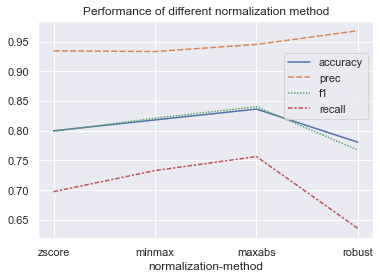

In [29]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

df = pd.read_csv("dd3.csv",encoding = "utf-8")
dd=[df['accuracy'],df['prec'],df['f1'],df['recall']]
sns.lineplot(data=df)

fig = sns.lineplot(x = "normalization-method",data=df)
fig.legend(loc='center right', bbox_to_anchor=(1,0.7), ncol=1)
fig.set_title("Performance of different normalization method")
scatter_fig = fig.get_figure()
scatter_fig.savefig("compare2.png", dpi = 400)


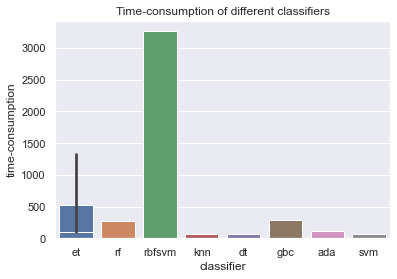

In [33]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

df = pd.read_csv("dd5.csv",encoding = "utf-8")

sns.barplot(data=df)

fig = sns.barplot(x = "classifier",y = "time-consumption",data=df)
# fig.legend(loc='center right', bbox_to_anchor=(1,0.7), ncol=1)
fig.set_title("Time-consumption of different classifiers")
scatter_fig = fig.get_figure()
scatter_fig.savefig("compare3.png", dpi = 400)


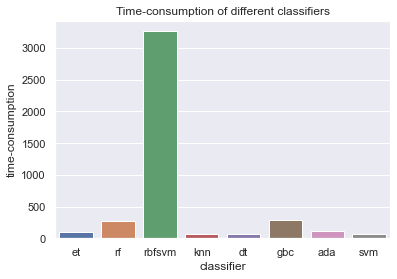

In [34]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

df = pd.read_csv("dd5.csv",encoding = "utf-8")

# sns.barplot(data=df)

fig = sns.barplot(x = "classifier",y = "time-consumption",data=df)
# fig.legend(loc='center right', bbox_to_anchor=(1,0.7), ncol=1)
fig.set_title("Time-consumption of different classifiers")
scatter_fig = fig.get_figure()
scatter_fig.savefig("compare3.png", dpi = 400)


In [13]:
!pip install fsspec

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
